<a href="https://colab.research.google.com/github/rahuls569/Assignment_1/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip install torch is used to install the pytorch \
To import the PyTorch library in your Python code, you can use the import statement as follows: import torch
Training is happening on GPU
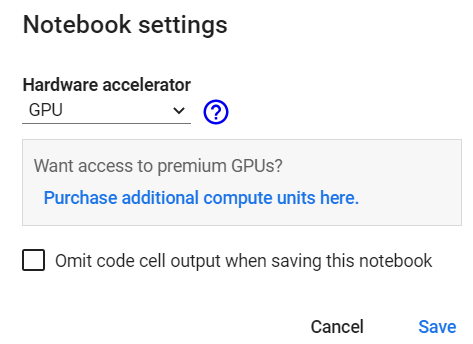

In [ ]:
!pip install torch
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torchvision 
import torchvision.transforms as transforms

To import the PyTorch vision library (torchvision) in your Python code, you can use the import statement as follows:**import torchvision** \
It provides access to datasets, models, transforms, utils, etc


In [ ]:
train_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



label: 5
image size: torch.Size([1, 28, 28])


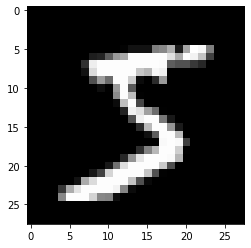

In [ ]:
sample = next(iter(train_set))
image, label=sample
import numpy as np
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth=120)
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)
print('image size:', image.shape)

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=32,
    shuffle=True
)
batch = next(iter(train_loader))
images, labels = batch
images.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

labels: tensor([3, 9, 0, 0, 1, 5, 6, 7, 7, 4, 7, 3, 2, 4, 9, 7, 3, 1, 7, 1, 2, 1, 8, 2, 1, 2, 1, 0, 9, 7, 4, 4])


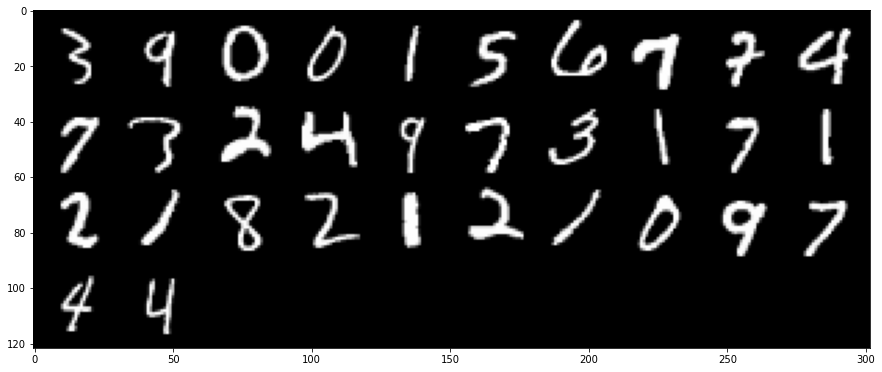

In [ ]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

Now, a training data as a tensor of random number between 0 and 9 is created. 

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


image size: torch.Size([1, 28, 28])
label: 5
5
10


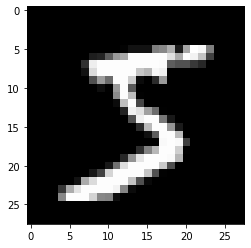

In [ ]:
# this one more method to create image and random number

import torch
from torch.utils.data import Dataset, DataLoader

class TwoInputDataset(Dataset):
  def __init__(self, mnist_data, num_samples):
    # mnist_data should be a PyTorch dataset for the MNIST dataset
    # num_samples is the number of samples to generate
    self.mnist_data = mnist_data
    self.num_samples = num_samples
  
  def __len__(self):
    return len(self.mnist_data)
  
  def __getitem__(self, idx):
    # Generate a random number between 0 and 9
    y = torch.randint(0, 10, (1,)).item()
    # Get a random image from the MNIST dataset 
    x, label = self.mnist_data[idx]
    # add minist data label and random number
    Add=label+y
    return x, y, label, Add

# Create a dataset with 1000 samples
dataset = TwoInputDataset(train_set, 1000)
len(dataset)
x_1, y_1, label_1,Add = dataset[0]
torch.set_printoptions(linewidth=120)
plt.imshow(x_1.squeeze(), cmap='gray')
print('image size:', x_1.shape)
print('label:',label_1)
print(y_1)
print(Add)

In [ ]:
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)
batch_2 = next(iter(data_loader))
len(batch_2[0])
images,numbers, labels, adds = batch_2
images.shape, numbers.shape, labels.shape, adds.shape

(torch.Size([32, 1, 28, 28]),
 torch.Size([32]),
 torch.Size([32]),
 torch.Size([32]))

labels: tensor([9, 9, 0, 7, 7, 9, 1, 8, 0, 1, 2, 8, 7, 1, 0, 7, 8, 1, 0, 5, 0, 2, 9, 7, 9, 3, 8, 1, 1, 0, 7, 5])
numbers: tensor([3, 2, 3, 7, 1, 4, 3, 3, 9, 4, 5, 3, 2, 0, 4, 7, 1, 8, 8, 8, 9, 1, 1, 7, 3, 2, 0, 7, 8, 3, 1, 5])
adds: tensor([12, 11,  3, 14,  8, 13,  4, 11,  9,  5,  7, 11,  9,  1,  4, 14,  9,  9,  8, 13,  9,  3, 10, 14, 12,  5,  8,  8,
         9,  3,  8, 10])


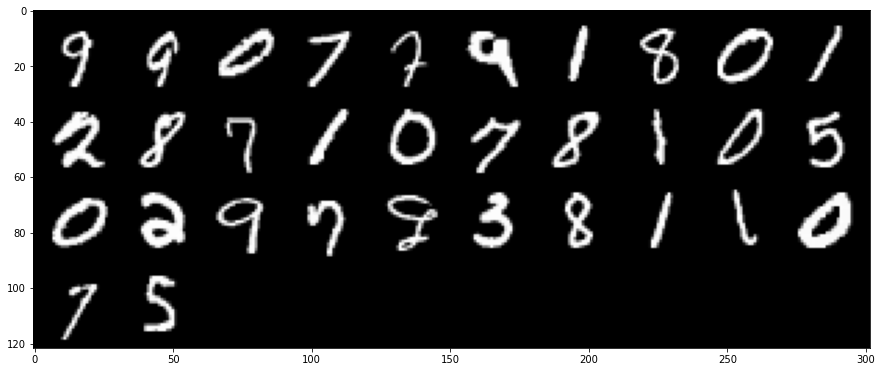

In [ ]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)    #### see the labels
print('numbers:', numbers)  #### see the numbers
print('adds:',adds)         ### see the adds

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out1 = nn.Linear(in_features=60, out_features=10)
    self.out2 = nn.Linear(in_features=60, out_features=18)
  
  def forward(self, t, t1):
    # input layer
    x = t
    # conv1 layer
    x = self.conv1(x) # 28 > 24
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 28 | 24 | 12
    # conv2 layer
    x = self.conv2(x) # 12
    x = F.relu(x) # 8
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 12 | 8 | 4 >> 12x4x4
    # reshapre
    x = x.reshape(-1, 12 * 4 * 4)
    # fc1 layer
    x = self.fc1(x)
    y2=x+t1
    x = F.relu(x)
    y2 = F.relu(x)
    # fc2 layer
    x = self.fc2(x)
    x = F.relu(x)
    y2 = self.fc2(y2)
    y2 = F.relu(y2)
    # output layer
    out1 = self.out1(x)
    out2= self.out2(y2)
    # x = F.softmax(x, dim=1)
    return out1, out2
# Create an instance of the TwoInputTwoOutputNet model
model = Network()
# Convert y to a tensor
y_1 = torch.tensor([y_1])
x_1.shape, x_1.unsqueeze(0).shape
# Pass the inputs to the model to obtain the outputs
pred1,pred2 = model(x_1, y_1)
pred1,pred2

(tensor([[ 0.0116,  0.1237, -0.0927,  0.0014,  0.0957,  0.0002,  0.0066,  0.0897, -0.1390, -0.0485]],
        grad_fn=<AddmmBackward0>),
 tensor([[ 0.0463,  0.0401,  0.1230,  0.0374, -0.0308, -0.1244,  0.0455, -0.0012, -0.0979,  0.1104, -0.0646,  0.0447,
           0.0577,  0.0867, -0.0645,  0.0020, -0.0794, -0.0316]], grad_fn=<AddmmBackward0>))

In [ ]:
F.softmax(pred1, dim=1)

tensor([[0.1004, 0.1123, 0.0904, 0.0993, 0.1092, 0.0992, 0.0999, 0.1085, 0.0863, 0.0945]], grad_fn=<SoftmaxBackward0>)

In [ ]:
F.softmax(pred2, dim=1)

tensor([[0.0577, 0.0574, 0.0623, 0.0572, 0.0534, 0.0487, 0.0577, 0.0550, 0.0500, 0.0616, 0.0517, 0.0576, 0.0584, 0.0601,
         0.0517, 0.0552, 0.0509, 0.0534]], grad_fn=<SoftmaxBackward0>)

In [ ]:
def get_num_correct1(pred1, labels):
  return pred1.argmax(dim=1).eq(labels).sum().item()

In [ ]:
def get_num_correct2(pred2, labels):
  return pred2.argmax(dim=1).eq(labels).sum().item()

In [ ]:
torch.set_grad_enabled(True) 

In [ ]:
# Use the GPU 
device = torch.device("GPU")

In [ ]:
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)
for x_batch, y_batch, label_batch, Add_batch in data_loader:
    # Move the data to the correct device
    x_batch = x_batch.to(device)
    
    y_batch = y_batch.to(device)
    label_batch = label_batch.to(device)
    Add_batch = Add_batch.to(device)
    break


In [ ]:
# Define the loss function and the optimizer

optimizer = torch.optim.Adam(model.parameters())
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model.to(device)

# Iterate through the data in the data loader
for epoch in range(2):
  total_loss1=0
  total_loss2=0
  total_correct1=0
  total_correct2=0

  for x_batch, y_batch, label_batch, Add_batch in data_loader:
    # Move the data to the correct device
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)          # Get Batch
    label_batch = label_batch.to(device)
    Add_batch = Add_batch.to(device)
    
    # Make predictions
    preds1, preds2 = model(x_batch, y_batch)    # Pass Batch       
    
    # Compute the loss
    loss1 = F.cross_entropy(preds1, label_batch)
    loss2 = F.cross_entropy(preds2, Add_batch)
    loss = loss1 + loss2
    optimizer.zero_grad()
    
    # Backpropagate the gradients
    loss.backward()       # Calculate Gradients
    
    # Update the model's parameters
    optimizer.step()       # Update Weights
    total_loss1 += loss1.item()
    total_loss2 += loss2.item()

    total_correct1 += get_num_correct1(preds1, label_batch)
    total_correct2 += get_num_correct2(preds2, Add_batch)
    print(
      "epoch:", epoch, 
      "total_correct1:", total_correct1, 
      "loss1:", total_loss1,
      "total_correct2:", total_correct2, 
      "loss2:", total_loss2
      )
    


RuntimeError: ignored